<a href="https://colab.research.google.com/github/roshan-1234/Python/blob/main/SHM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-8-8764755f515d>:40: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  point.set_data(x, y)
<ipython-input-8-8764755f515d>:44: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  point_proj.set_data(0, y)  # SHM point moves vertically
<ipython-input-8-8764755f515d>:40: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  point.set_data(x, y)
<ipython-input-8-8764755f515d>:44: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  point_proj.set_data(0, y)  # SHM point moves vertically


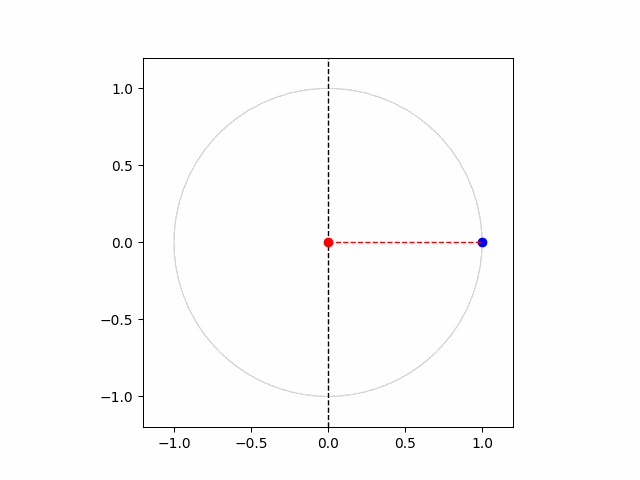

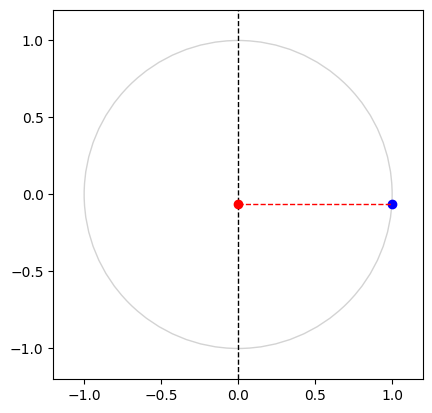

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter

# Parameters
radius = 1
omega = 2 * np.pi  # Angular velocity (1 rotation per second)
fps = 100  # Frames per second
duration = 2  # Animation duration in seconds
dt = 1 / fps  # Time step

# Time array
t = np.arange(0, duration, dt)

# Initialize figure
fig, ax = plt.subplots()
ax.set_xlim(-1.2, 1.2)  # Horizontal range for the circle
ax.set_ylim(-1.2, 1.2)  # Vertical range for the SHM projection
ax.set_aspect('equal')

# Add circle
circle = plt.Circle((0, 0), radius, color='lightgray', fill=False)
ax.add_artist(circle)

# Add vertical diameter line
ax.plot([0, 0], [-1.2, 1.2], 'k--', lw=1, label="Diameter")  # Vertical dashed line

# Initialize point and projection lines
point, = ax.plot([], [], 'bo', label="UCM")  # Blue dot for circular motion
line_proj, = ax.plot([], [], 'r--', lw=1)  # Red dashed line for projection
point_proj, = ax.plot([], [], 'ro', label="SHM")  # Red dot for SHM projection

# Update function for animation
def update(frame):
    theta = omega * frame * dt  # Calculate angle
    x = radius * np.cos(theta)
    y = radius * np.sin(theta)

    # Update UCM point
    point.set_data(x, y)

    # Update projection line and SHM point (on the vertical line)
    line_proj.set_data([0, x], [y, y])  # Connect circle point to projection
    point_proj.set_data(0, y)  # SHM point moves vertically

    return point, line_proj, point_proj

# Create animation
ani = FuncAnimation(fig, update, frames=len(t), interval=1000 / fps, blit=True)

# Save animation as GIF
gif_writer = PillowWriter(fps=fps)
ani.save("vertical_circular_to_shm.gif", writer=gif_writer)

# Display the GIF
from IPython.display import Image
Image(open("vertical_circular_to_shm.gif", "rb").read())

